In [1]:
import math as m

def watts_to_dBm(watts:float)->float:
    ''' Convertir potencia de Watts en dBm. ''' 
    return round(10 * m.log10(watts/0.001))

def watts_to_dB(watts:float)->float:
    ''' Convertir potencia de Watts en dB. ''' 
    return round(10 * m.log10(watts))

def snr(signal:float, noise:float)->float:
    ''' Calcular snr de dos potencias en dB. ''' 
    return round(10 * watts_to_dB(signal/noise))

def dB_to_watts(decibelios:float)->float:
    ''' Calcular snr de dos potencias en dB. ''' 
    return round(100 / 10**(decibelios/10))


In [ ]:
round(10 * m.log10(watts))

In [5]:
1*10**(45/10)

31622.776601683792

In [2]:
import math as m
20 * m.log10(70.7/100)

-3.011611724062011

In [35]:
dB_to_watts(-3)

200

In [50]:
pos_x=300
pos_y=37.4

salto_y=(1565.7-579.13)/40
salto_x=(2276.62-1195.46)/300

y=round(1565.7-(pos_y*salto_y), 2)
x=round(1195.46+(pos_x*salto_x), 2)

print(f"(x,y)=({x}, {y})")


(x,y)=(2276.62, 643.26)


In [51]:
10e-12*10**(40/10)

1e-07

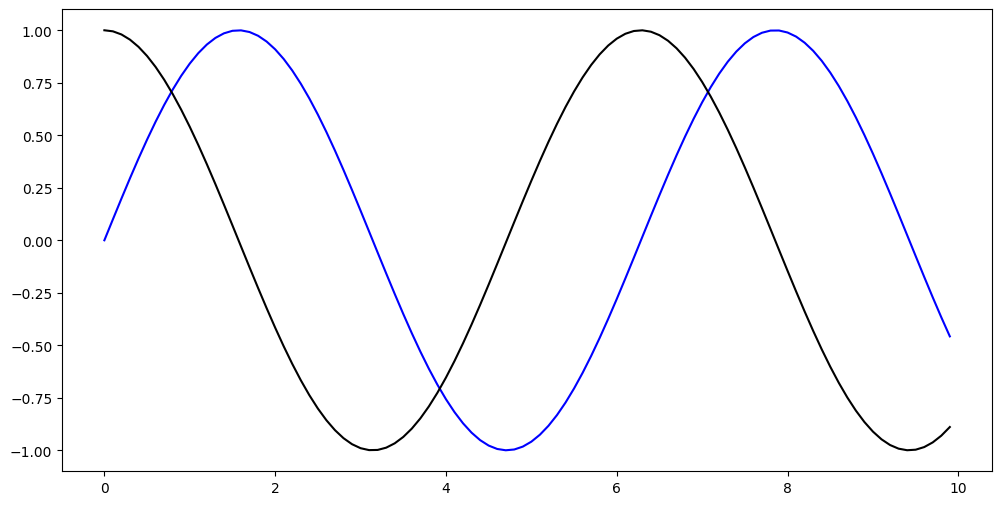

In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(0, 10, 0.1)
y = np.sin(x)
z = np.cos(x)

ax.plot(x, y, color='blue', label='Sine wave')
ax.plot(x, z, color='black', label='Cosine wave')

plt.show()



In [31]:
def plotSpectrum(y,Fs):
    """ Gráfica la amplitud del espectro de y(t) """
    n = len(y) # longitud de la señal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # 2 lados del rango de frecuencia
    frq = frq[range(int(n/2))] # Un lado del rango de frecuencia
    Y = np.fft.fft(y)/n # fft calcula la normalización
    Y = Y[range(int(n/2))]
    plt.plot(frq,abs(Y),'r') # gráfica el espectro de frecuencia
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('|Y(f)|')

def plotSpectrum2(y,Fs):
    """ Gráfica la amplitud del espectro de y(t) """
    n = len(y) # longitud de la señal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # 2 lados del rango de frecuencia
    Y = np.fft.fft(y)/n # fft calcula la normalización
    plt.plot(frq,abs(Y),'r') # gráfica el espectro de frecuencia
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('|Y(f)|')

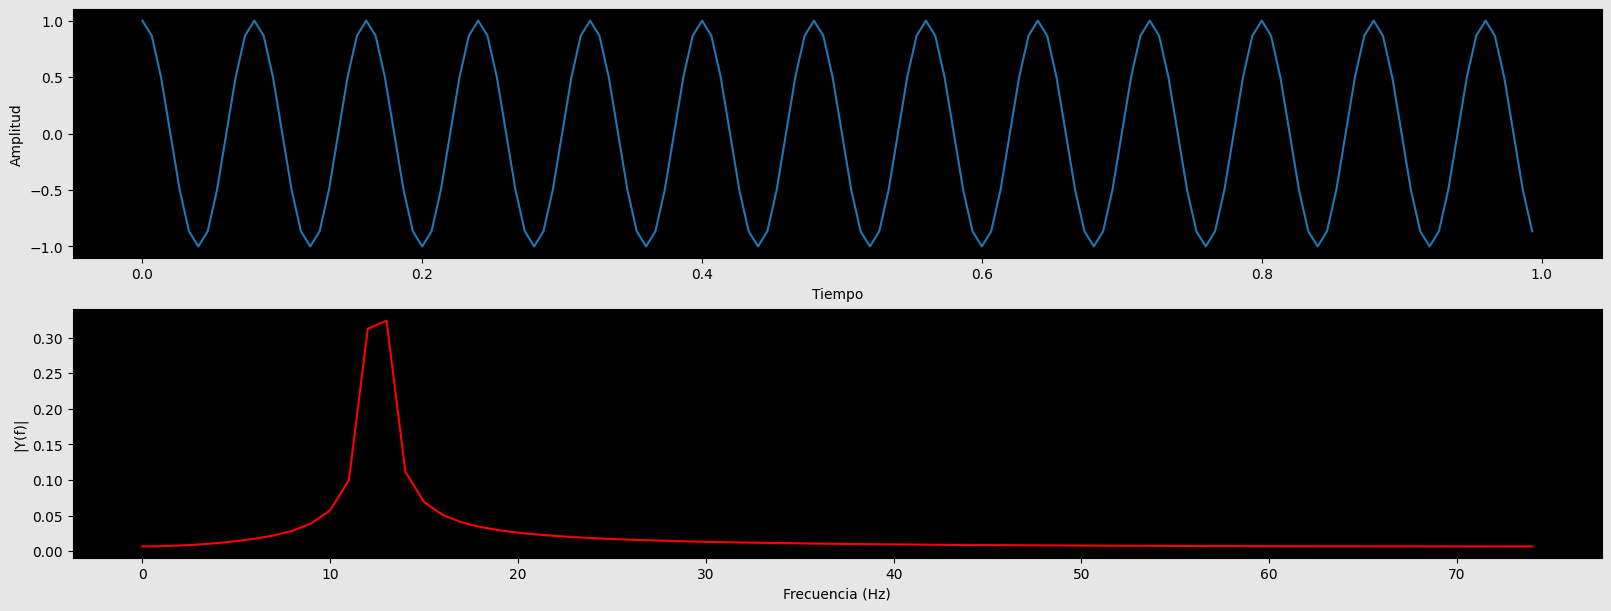

In [64]:
Fs = 150.0;            # rata de muestreo
Ts = 1.0/Fs;            # intervalo de muestreo
t = np.arange(0,1,Ts)   # vector tiempo
f = 12.5;                 # frecuencia de la señal
w = 2*np.pi*f
y = np.cos(w*t)

#Proceso de gráficas la señal
fig = plt.figure(layout="constrained",facecolor='0.9', figsize=(16,6))
plt.rcParams['axes.facecolor']='black'



plt.subplot(2,1,1)
plt.plot(t,y)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.subplot(2,1,2)

#Se llama a la función con la señal y la rata de muestreo
plotSpectrum(y,Fs)
plt.show()

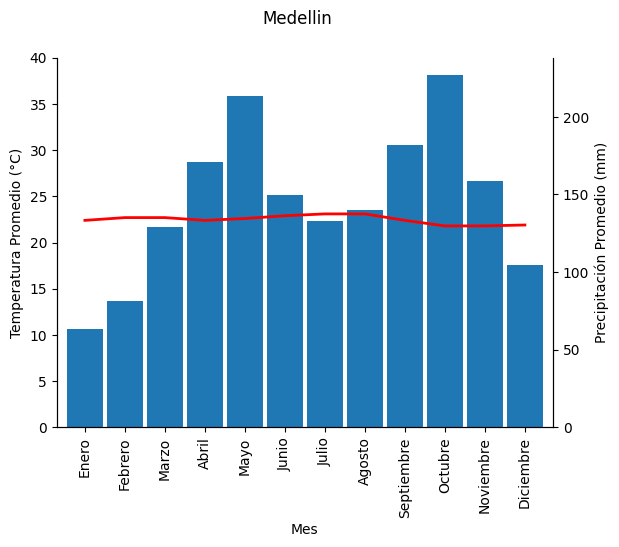

In [3]:
import io
import matplotlib.pyplot as plt
import pandas as pd

data = io.StringIO("""\
Mes,Precipitación Promedio(mm),Temperatura Promedio (°C)
Enero,63.2,22.4
Febrero,81.4,22.7
Marzo,129.1,22.7
Abril,170.7,22.4
Mayo,213.5,22.6
Junio,149.4,22.9
Julio,133.1,23.1
Agosto,139.7,23.1
Septiembre,181.8,22.4
Octubre,226.7,21.8
Noviembre,158.9,21.8
Diciembre,104.8,21.9
""")

df = pd.read_csv(data, index_col="Mes")


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

df["Temperatura Promedio (°C)"].plot(color="red", ax=ax2, lw=2)
df["Precipitación Promedio(mm)"].plot(kind='bar', width=0.9,  ax=ax1)

ax2.set_ylim(0,  40)
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()
ax2.yaxis.set_label_position("left")
ax2.yaxis.tick_left()
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

fig.suptitle("Medellin")
ax2.set_ylabel("Temperatura Promedio (°C)")
ax1.set_ylabel("Precipitación Promedio (mm)")

plt.show()

In [4]:
import numpy as np
print(np.fft.fft([0, 1, 0, 0]))
#array([ 1.+0.j,  0.-1.j, -1.+0.j,  0.+1.j]) # may vary
print(np.fft.rfft([0, 1, 0, 0]))
#array([ 1.+0.j,  0.-1.j, -1.+0.j]) # may vary

[ 1.+0.j  0.-1.j -1.+0.j  0.+1.j]
[ 1.+0.j  0.-1.j -1.+0.j]


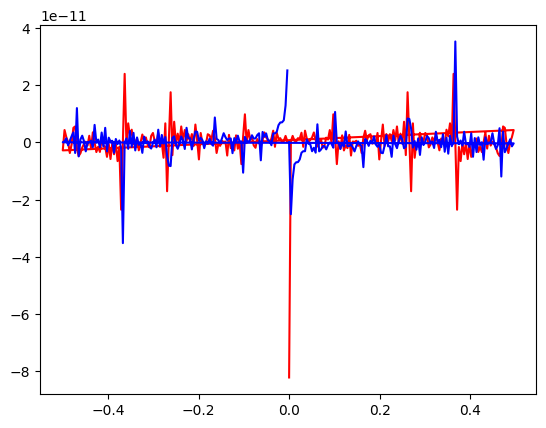

In [10]:
import matplotlib.pyplot as plt
t = np.arange(256)
sp = np.fft.fft(np.sin(2*np.pi*10*t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, 'r')
plt.plot(freq, sp.imag, 'b')
plt.show()

In [17]:
gn = [0, 1, 2, 3, 4]
sp = np.fft.fft(gn)
M=np.abs(sp)
np.angle(sp)*180/np.pi

array([   0.,  126.,  162., -162., -126.])

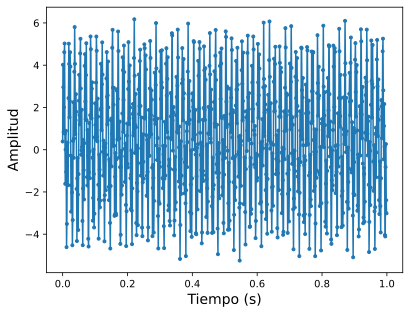

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


Ts = 0.001                                       # Definimos un tiempo y frecuencia de muestreo
Fs=1/Ts
w1 = 2*np.pi*60                                  # Definimos una frecuencia de 60 Hz para la señal 1
w2 = 2*np.pi*223                                 # Definimos una frecuencia de 223 Hz para la señal 2

n = Ts*np.arange(0, 1000)
ruido = np.random.random(len(n))
x = 3*np.sin(w1*n)+2.3*np.sin(w2*n)+ruido        # Construimos una señal compuesta por la señal 1 y 2, y agregamos ruido


plt.plot(n,x,'.-')
plt.xlabel('Tiempo (s)', fontsize='14')
plt.ylabel('Amplitud', fontsize='14')
plt.show()

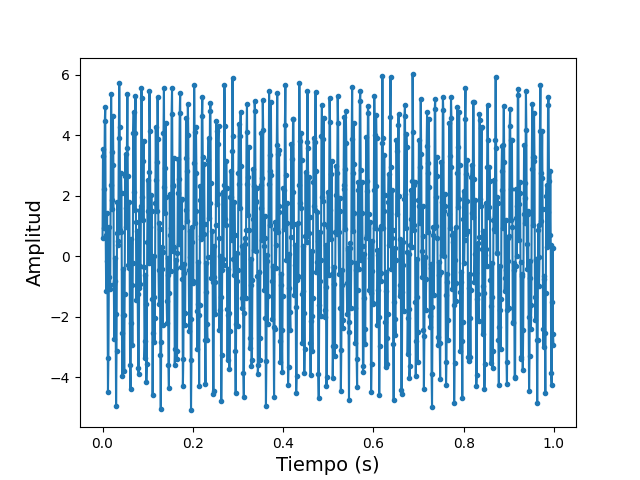

In [3]:
%matplotlib ipympl

Ts = 0.001                                       # Definimos un tiempo y frecuencia de muestreo
Fs=1/Ts
w1 = 2*np.pi*60                                  # Definimos una frecuencia de 60 Hz para la señal 1
w2 = 2*np.pi*223                                 # Definimos una frecuencia de 223 Hz para la señal 2

n = Ts*np.arange(0, 1000)
ruido = np.random.random(len(n))
x = 3*np.sin(w1*n)+2.3*np.sin(w2*n)+ruido        # Construimos una señal compuesta por la señal 1 y 2, y agregamos ruido


plt.plot(n,x,'.-')
plt.xlabel('Tiempo (s)', fontsize='14')
plt.ylabel('Amplitud', fontsize='14')
plt.show()

In [ ]:
%matplotlib notebook

Ts = 0.001                                       # Definimos un tiempo y frecuencia de muestreo
Fs=1/Ts
w1 = 2*np.pi*60                                  # Definimos una frecuencia de 60 Hz para la señal 1
w2 = 2*np.pi*223                                 # Definimos una frecuencia de 223 Hz para la señal 2

n = Ts*np.arange(0, 1000)
ruido = np.random.random(len(n))
x = 3*np.sin(w1*n)+2.3*np.sin(w2*n)+ruido        # Construimos una señal compuesta por la señal 1 y 2, y agregamos ruido


plt.plot(n,x,'.-')
plt.xlabel('Tiempo (s)', fontsize='14')
plt.ylabel('Amplitud', fontsize='14')
plt.show()

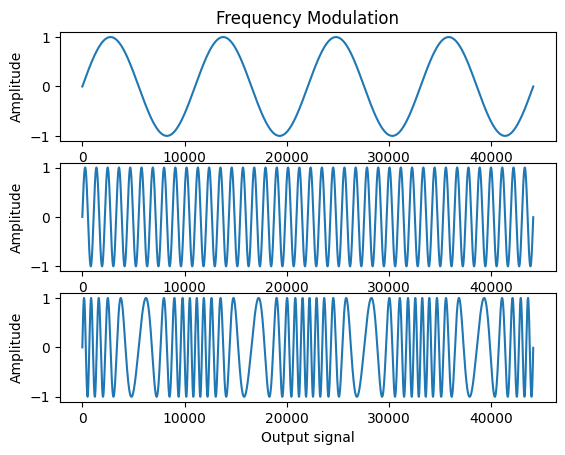

In [1]:
import numpy as np
import matplotlib.pyplot as plt

modulator_frequency = 4.0
carrier_frequency = 40.0
modulation_index = 1.0

time = np.arange(44100.0) / 44100.0
modulator = np.sin(2.0 * np.pi * modulator_frequency * time) * modulation_index
carrier = np.sin(2.0 * np.pi * carrier_frequency * time)
product = np.zeros_like(modulator)

for i, t in enumerate(time):
    product[i] = np.sin(2. * np.pi * (carrier_frequency * t + modulator[i]))

plt.subplot(3, 1, 1)
plt.title('Frequency Modulation')
plt.plot(modulator)
plt.ylabel('Amplitude')
plt.xlabel('Modulator signal')
plt.subplot(3, 1, 2)
plt.plot(carrier)
plt.ylabel('Amplitude')
plt.xlabel('Carrier signal')
plt.subplot(3, 1, 3)
plt.plot(product)
plt.ylabel('Amplitude')
plt.xlabel('Output signal')
plt.show()